# Signal-approximating

Now we look at analyzing the signal to work out the curve.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from src.data_processing import convert_time, create_data_from_entry, load_data

%matplotlib inline

Lets import the data and clean it up to be how we want it.

In [2]:
data = load_data(100000)

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Time
0,4.518552,4.450329,4.418448,4.399958,4.232905,4.364889,4.349268,4.384018,4.372859,4.489223,...,4.583588,4.619294,4.657232,4.733744,4.664564,4.699314,4.683055,4.667433,4.580400,2018-09-21 16:56:48.930999994
1,4.662333,4.594428,4.530986,4.521740,4.437258,4.376048,4.420680,4.308780,4.335241,4.349268,...,4.443634,4.479021,4.523972,4.572749,4.621207,4.601122,4.675722,4.678910,4.640973,2018-09-21 16:56:49.041000128
2,4.574343,4.545651,4.414623,4.446503,4.410478,4.276900,4.364252,4.322807,4.329821,4.408565,...,4.487310,4.581038,4.601760,4.649262,4.719398,4.696445,4.677954,4.710791,4.597616,2018-09-21 16:56:49.367999792
3,4.467225,4.557128,4.540231,4.637466,4.605267,4.711109,4.667433,4.705371,4.678273,4.630452,...,4.495280,4.479658,4.398364,4.403146,4.286783,4.359789,4.301766,4.342573,4.410478,2018-09-21 16:56:49.640000105
4,4.386568,4.472645,4.553302,4.616744,4.628539,4.760205,4.666477,4.698039,4.673172,4.654681,...,4.534811,4.435664,4.408565,4.401552,4.286145,4.342892,4.349268,4.333966,4.378279,2018-09-21 16:56:49.912999868


In [4]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Time
99995,4.680504,4.652450,4.590283,4.533855,4.493367,4.443953,4.400595,4.407928,4.330459,4.295390,...,4.337154,4.415898,4.483484,4.554896,4.546607,4.635553,4.567967,4.711747,4.679229,2018-09-22 00:56:02.032000065
99996,4.390712,4.390712,4.409841,4.500381,4.562228,4.587414,4.656275,4.727687,4.639060,4.784434,...,4.595065,4.539593,4.553302,4.453517,4.441402,4.359470,4.364571,4.347355,4.327589,2018-09-22 00:56:02.305000067
99997,4.692300,4.634916,4.613237,4.543100,4.507713,4.425143,4.399320,4.314200,4.336516,4.389437,...,4.368715,4.411753,4.473282,4.496874,4.586139,4.602716,4.701227,4.690387,4.673172,2018-09-22 00:56:02.577000141
99998,4.348312,4.428331,4.443953,4.488904,4.577531,4.634916,4.599528,4.746178,4.643204,4.716210,...,4.580400,4.572111,4.510901,4.453835,4.358832,4.429925,4.249483,4.387206,4.312606,2018-09-22 00:56:02.849999905
99999,4.679867,4.626945,4.566054,4.520146,4.454154,4.429606,4.406971,4.333009,4.312287,4.322807,...,4.396770,4.422912,4.510582,4.555852,4.625033,4.619613,4.726731,4.644798,4.700270,2018-09-22 00:56:03.177000046


Lets look at a row of data again

In [5]:
first_tenth_second = create_data_from_entry(0, data)

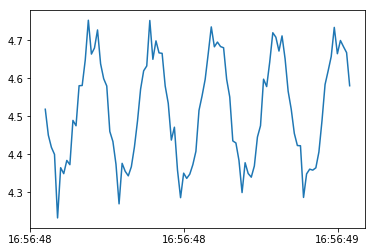

In [6]:
plt.plot(first_tenth_second["Time"], first_tenth_second[1])

The DAQ is sampling at 1000Hz collecting 100 samples before giving the data to the IOC. This happens every 0.1 seconds. Each sample is take every 0.001 seconds. At 50Hz, the signal repeats every 1/50 = 0.02 seconds. So we need to average samples every 20 element of the array. 

Taking the first sample and the twentith sample and averaging these does the following:

In [7]:
row = data.iloc[0,:]
row.head()

1    4.51855
2    4.45033
3    4.41845
4    4.39996
5     4.2329
Name: 0, dtype: object

In [8]:
sample1 = row[0]
sample2 = row[19]
average = np.mean([sample1, sample2])
print("Sample1 is {}".format(sample1))
print("Sample2 is {}".format(sample2))
print("Average is {}".format(average))

Sample1 is 4.518552461
Sample2 is 4.598890817
Average is 4.558721639


Now lets do that for all rows.

In [9]:
def period_average(row):
    return np.mean([row[0], row[19]])
    
average_values = data.apply(period_average, axis=1)

In [10]:
average_values.head()

0    4.558722
1    4.660739
2    4.583110
3    4.447459
4    4.368715
dtype: float64